# SVM 다중 분류 - IRIS 데이터셋 / Wine 데이터 셋

## #01. 준비작업

### [1] 패키지 가져오기

In [23]:
import warnings
warnings.filterwarnings(action='ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
from sklearnex import patch_sklearn
patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## #02. IRIS 데이터 셋

### [1] 데이터 가져오기

In [24]:
origin = my_read_excel("https://data.hossam.kr/mldata/iris.xlsx", categories=['Species'], info=False)

### [2] 데이터 전처리

1. 종속변수 라벨링
3. 훈련/검증 데이터 분리 + 데이터 스케일링

In [25]:
df = my_labelling(origin, 'Species')

x_train, x_test, y_train, y_test = my_train_test_split(df, yname='Species', test_size=0.2, scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### [3] SVM 분류 구현

n_jobs를 허용하지 않음
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[교차검증 TOP5]
+----+----------+----------+-----+-------------------+
|    | kernel   |   degree |   C |   mean_test_score |
|----+----------+----------+-----+-------------------|
| 12 | rbf      |        4 |   1 |          0.966667 |
| 14 | rbf      |        5 |   1 |          0.966667 |
|  8 | rbf      |        2 |   1 |          0.966667 |
| 10 | rbf      |        3 |   1 |          0.966667 |
| 19 | poly     |        3 |  10 |          0.958333 |
+----+----------+----------+-----+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.983333 |     0.933333 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,

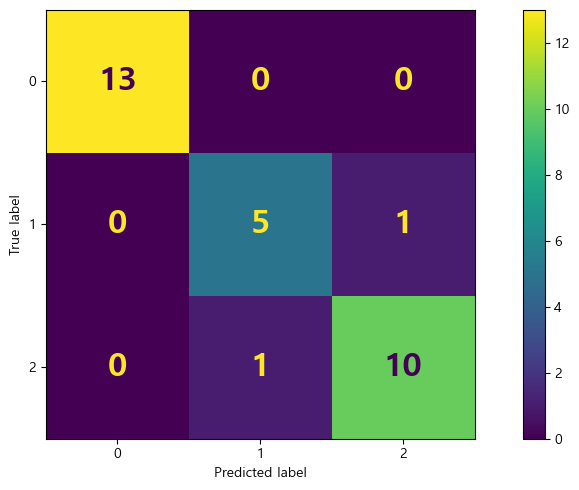


[학습곡선]


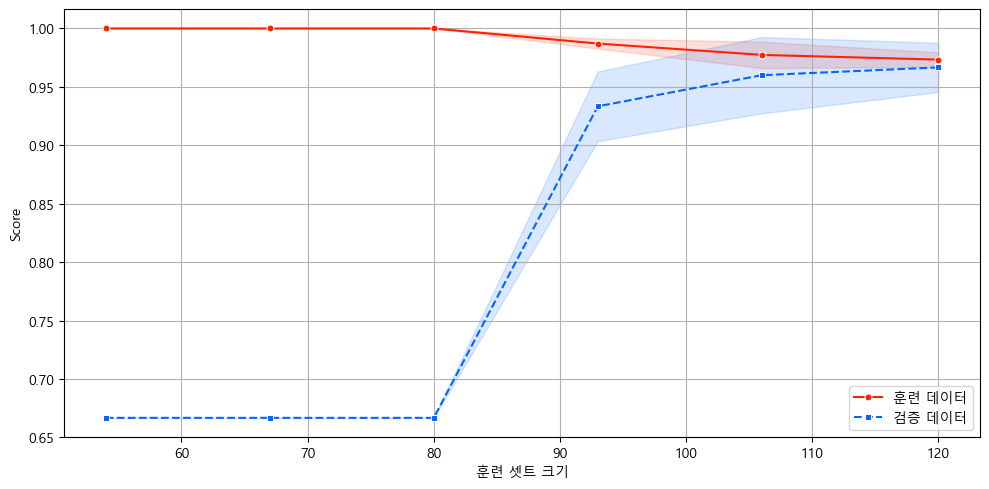

SVC(C=1, degree=2)

In [26]:
my_svc_classification(x_train, y_train, x_test, y_test)

> 로지스틱 회귀의 경우 96.7%의 정확도와 95.2%의 정밀도를 보이고, KNN은 90%의 정확도와 87.1%의 정밀도를 보였다.
>
> SVM의 경우 93.3%(96.7%)의 정확도와, 91.4%(95.2%)의 정밀도를 보였다.
> (괄호 안은 하이퍼파라미터 설정을 더 늘린 경우)
> 
> 그러므로 이 데이터셋은 로지스틱 회귀와 SVM에서 가장 좋은 성능을 보인다.

## #03. Wine 데이터 셋

### [1] 데이터 가져오기

In [27]:
origin = my_read_excel("https://data.hossam.kr/mldata/wine.xlsx", categories=['class'], info=False)

### [2] 데이터 전처리

1. 종속변수 타입 변환
2. 훈련/검증 데이터 분할 + 데이터 스케일링

In [28]:
df = origin.copy()
df['class'] = df['class'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df, yname='class', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

### [3] SVM 분류 구현

n_jobs를 허용하지 않음
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[교차검증 TOP5]
+----+----------+----------+-----+-------------------+
|    | kernel   |   degree |   C |   mean_test_score |
|----+----------+----------+-----+-------------------|
| 22 | rbf      |        5 |  10 |          0.978818 |
| 20 | rbf      |        4 |  10 |          0.978818 |
| 18 | rbf      |        3 |  10 |          0.978818 |
| 16 | rbf      |        2 |  10 |          0.978818 |
| 12 | rbf      |        4 |   1 |          0.971675 |
+----+----------+----------+-----+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |     0.972222 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,

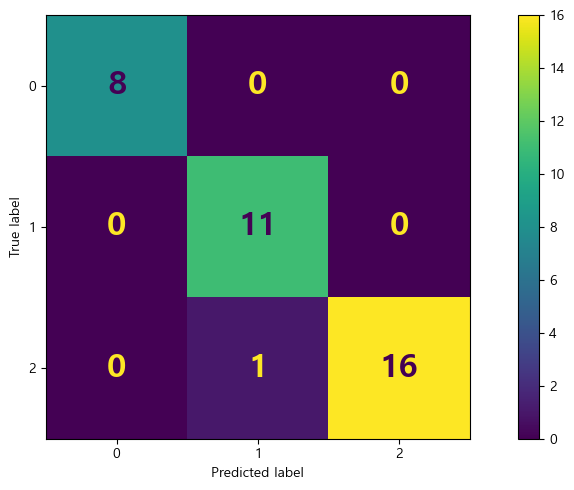


[학습곡선]


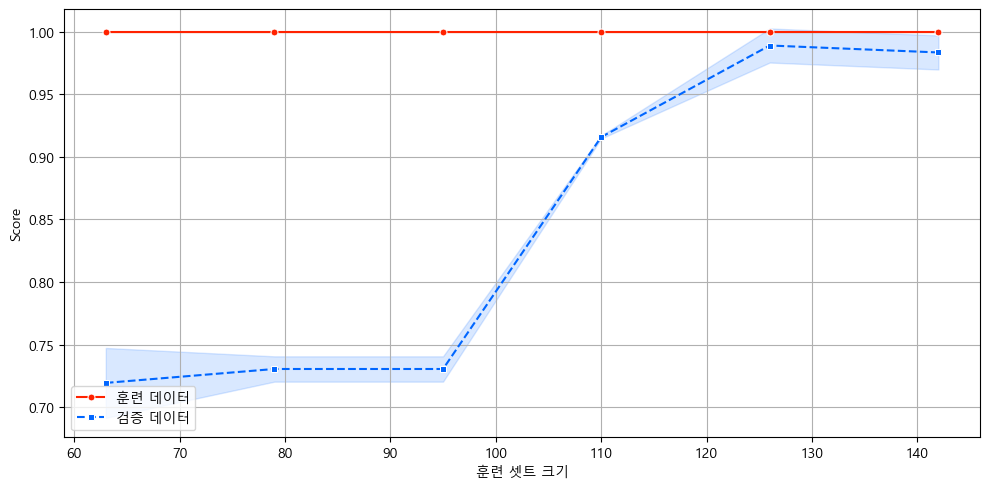

SVC(C=10, degree=2)

In [29]:
my_svc_classification(x_train, y_train, x_test, y_test)

> 로지스틱과 KNN 모두 정확도와 정밀도가 `100%`를 보였으나 SVM의 경우 정확도와 정밀도가 각각 97.2%를 보였다.
>
> 하이퍼파라미터 조합에 대한 경우의 수를 축소하더라도 성능의 변화가 없었다.
>
> 이 데이터셋에 SVM은 적합하지 않은 모형으로 판단할 수 있다.